# Titanic Death Prediction
<hr>

## Part 1: Exploratory Data Analysis (EDA)

In [1]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

### Load Data

In [2]:
data = pd.read_csv('../data/train.csv')

In [3]:
data.tail()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


<br>

In [5]:
data.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Check clomun dtypes

In [6]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

<br>

### Check for total Null Values.

In [ ]:
data.isnull().sum()

The **Age, Cabin and Embarked** have null values. We will fix these in the next notebook.

<br>
<hr>

### Question: How many Survivors? Who were they?

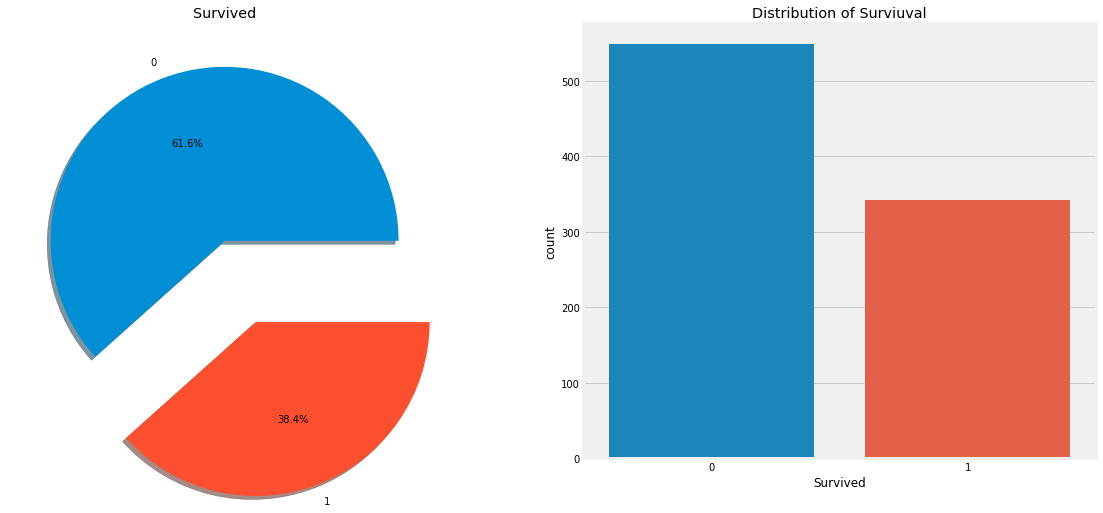

In [7]:
# Set up 2 axes to plot
f, ax = plt.subplots(1,2, figsize=(18,8))

# ax[0]
data['Survived'].value_counts().plot(kind='pie', explode = [0,0.1], autopct = '%1.1f%%', ax = ax[0], shadow = True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')  # no need for y_label on pie chart.

## ax[1]
sns.countplot('Survived', data = data, ax = ax[1])
ax[1].set_title('Distribution of Surviuval')

plt.show()

## Ponder w/ Neighbor

What things do you notice? Write your observations here!

Most people died

<br>
<hr>

## The Types of Features found in Titanic Dataset

### Categorical Features:
A categorical variable is one that has two or more categories and each value in that feature can be categorised by them.For example, gender is a categorical variable having two categories (male and female). Now we cannot sort or give any ordering to such variables. They are also known as **Nominal Variables**.

**Categorical Features in the dataset: Gender,Embarked.**

### Ordinal Features:
An ordinal variable is similar to categorical values, but the difference between them is that we can have relative ordering or sorting between the values. For eg: If we have a feature like **Height** with values **Tall, Medium, Short**, then Height is a ordinal variable. Here we can have a relative sort in the variable.

**Ordinal Features in the dataset: PClass**

### Continous Feature:
A feature is said to be continous if it can take values between any two points or between the minimum or maximum values in the features column.

**Continous Features in the dataset: Age**

<br>
<hr>
<br>

## Analysing The Features

## ```data['Gender']``` --> Categorical Feature

In [25]:
data.groupby(['Gender','Survived'])['Survived'].count()

Gender  Survived
female  0           233
        1           233
male    0           733
        1           109
Name: Survived, dtype: int64

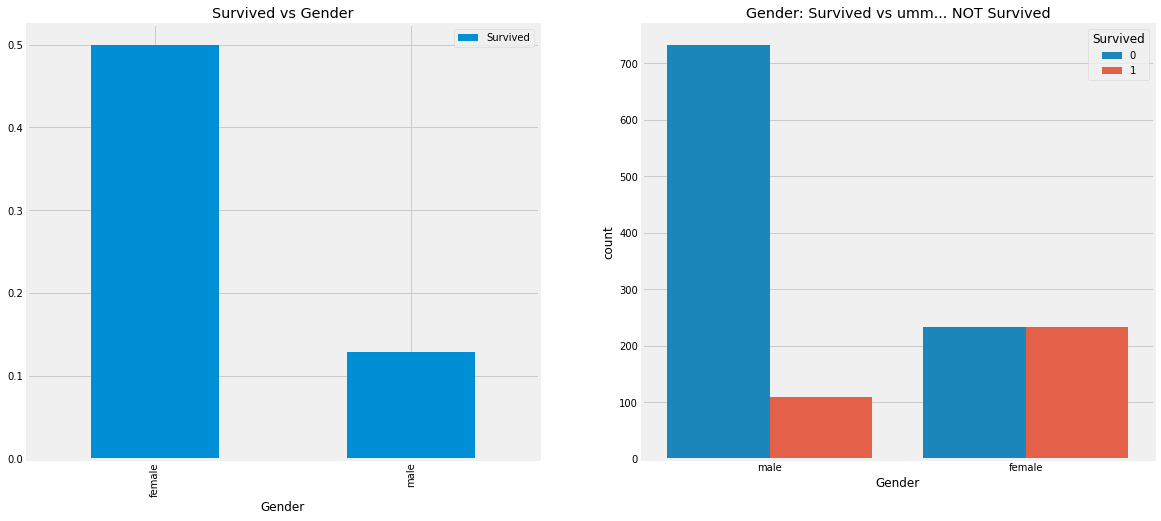

In [32]:
# Set up 2 axes to plot
f, ax = plt.subplots(1, 2, figsize= (18,8))

# ax[0]
data[['Gender','Survived']].groupby(['Gender']).mean().plot(kind='bar', ax=ax[0])
ax[0].set_title('Survived vs Gender')

# ax[1]
sns.countplot('Gender',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Gender: Survived vs umm... NOT Survived')

plt.show()

## Ponder w/ Neighbor

What things do you notice? Write your observations here!

<br>
<hr>
<br>

## ```data['Pclass']``` --> Ordinal Feature
margin = True ; will give the total amount 

In [15]:
pd.crosstab(index=data['Pclass'], columns=data['Survived'], margins = True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [19]:
pd.crosstab(index=[data['Pclass'], data['Gender']], columns=data['Survived'], margins = True).style.background_gradient(cmap='summer_r')

In [38]:
data.shape

(1308, 13)

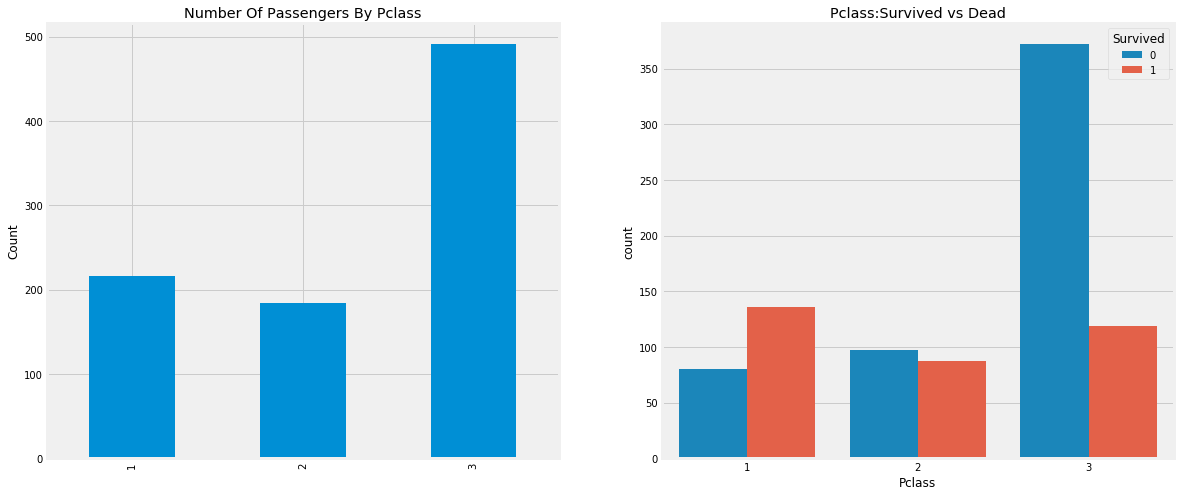

In [23]:
# Set up 2 axes
f,ax=plt.subplots(1,2,figsize=(18,8))

# ax[0]
#data['Pclass'].value_counts().plot(kind='bar', ax = ax[0])
data['Pclass'].value_counts().sort_index().plot(kind='bar', ax = ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')

# ax[1]
sns.countplot('Pclass', hue = 'Survived', data = data, ax = ax[1])
ax[1].set_title('Pclass:Survived vs Dead')

plt.show()

## Ponder w/ Neighbor

What things do you notice? Write your observations here!

Pclass played a part in survival rate


Next: we can further this visualization with seperating by gender 


<br>
<hr>
<br>

## `data['Pclass']` & `data['Gender']`

### Exercise 1: 

1. Create a multi-index `pd.crosstab()` that compares both `Gender` and `Survived` against `Pclass`
2. Make sure to pass in `True` for the margins parameter
3. For styles, add .styles.background_gradient(cmap='') to the end of your code.

4. **Possible cmap Values:** when you leave the cmap string blank aka '', python will spit back a list of possible values! 

In [32]:
# Crosstab Gender and Survived vs Pclass
pd.crosstab(index=[data['Pclass'], data['Gender']], columns=data['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Women in pClass1 are the most likely to survive

Then female are more likely to survive 

<br>

### Pointplots!

Are great for finding the average rate for some binary variable, in this case `survived`

1. You can add dimensions to this!
2. We can divide these approximations into the 3 `Pclass` classes along the x axis
3. Then, we can add the hue parameter to then further divide these groups by `Gender`

If we don't use hue we loose the visualization of unique value seperate plot points / lines

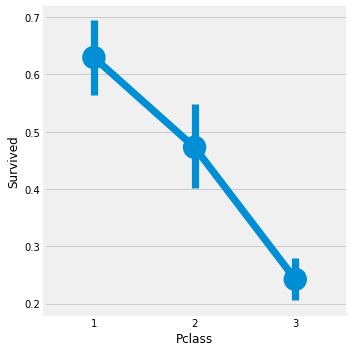

In [36]:
sns.catplot(x= 'Pclass', y= 'Survived', data= data, kind= 'point')
plt.show()

Versus using hue

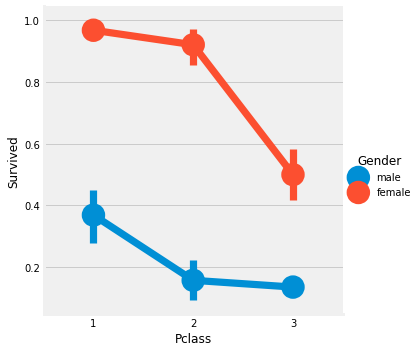

In [38]:
sns.catplot(x= 'Pclass', y= 'Survived', hue= 'Gender', data= data, kind= 'point')
plt.show()

kind="point" how many survived versus the total


Most important factor should be hue

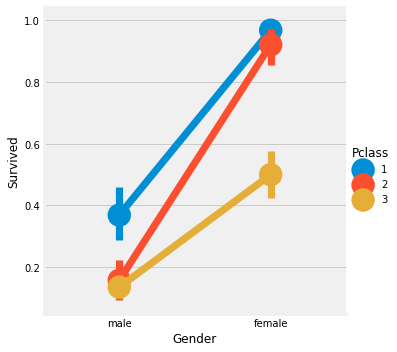

In [33]:
sns.catplot(x= 'Gender', y= 'Survived', hue= 'Pclass', data= data, kind= 'point')
plt.show()

not as clear

## Ponder w/ Neighbor

What things do you notice? Write your observations here!

<br>
<hr>
<br>

## ```data['Age']``` --> Continous Feature


In [42]:
print('Oldest Passenger was',data['Age'].max(),'years old.')
print('Youngest Passenger was',data['Age'].min(),'years old')
print()
print('Average Age on the ship was of:', round(data['Age'].mean()),'years.')

Oldest Passenger was 80.0 years old.
Youngest Passenger was 0.42 years old

Average Age on the ship was of: 30 years.


Most people on titanic  were young and not very wealthy

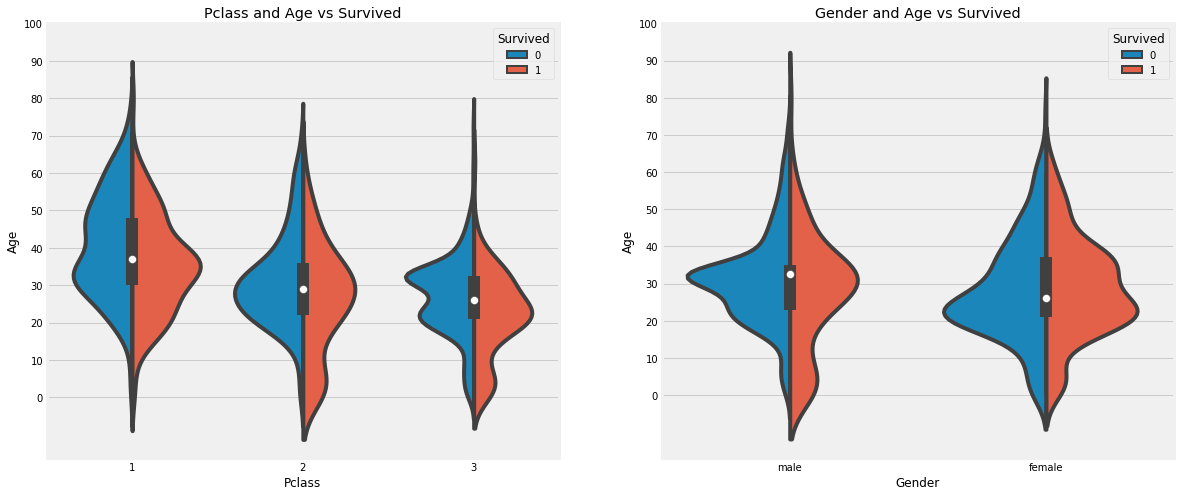

In [57]:
# Make 2 axes
f, ax = plt.subplots(1, 2, figsize = (18,8))

# ax[0] - pclass and age vs survived
sns.violinplot("Pclass", "Age", hue = "Survived", data = data, split = True, ax = ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))

# ax[1] - gender and age vs survived
sns.violinplot("Gender", "Age", hue = "Survived", data = data, split = True, ax = ax[1])
ax[1].set_title('Gender and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))

plt.show()

## Ponder w/ Neighbor

What things do you notice? Write your observations here!

Females had a greater chance of surviving, young males tended to survive more than young females. 

<br>
<hr>
<br>

### What's In A Name? ...mild Feature Engineering

### `data['Initial']`

In [44]:
data['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [45]:
data['Initial'] = data['Name'].str.extract('([A-Za-z]+)\.')

Okay so here we are using the Regex: **[A-Za-z]+)\.**. So what it does is, it looks for strings which lie between **A-Z or a-z** and followed by a **.(dot)**. So we successfully extract the Initials from the Name.

'+' any combination

) group

. period

In [46]:
data['Initial'].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Initial, dtype: object

### Exercise 2: 

1. Create a single-index `pd.crosstab()` that compares the new `Initial` variable against `Gender`
2. No need for the `margins` Parameter for this one!
3. For styles, add .styles.background_gradient(cmap='') to the end of your code.
4. Notice anything interesting?

In [51]:
pd.crosstab(index=data['Initial'], columns=data['Gender']).style.background_gradient(cmap="summer_r")

Gender,female,male
Initial,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


Okay so there are some misspelled Initials like Mlle or Mme that stand for Miss. I will replace them with Miss and same thing for other values.

#### Can we get away with changing the Female `'Dr.'` into a `'Mrs.'`?

In [52]:
data.loc[(data["Initial"] == "Dr") & (data["Gender"] == "female")]

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
796,797,1,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,D17,S,Dr


#### Change the female `'Dr'` into a `'Mrs'`

In [53]:
data.loc[(data["Initial"] == "Dr") & (data["Gender"] == "female"), "Initial"] = "Mrs"

#### `data['Initial']` is WAY too Sparse, let's fix it.

In [54]:
data['Initial'] = data['Initial'].replace({'Mlle':'Miss', 'Mme':'Miss', 'Ms':'Miss', 'Dr':'Mr', 'Major':'Mr', 'Lady':'Mrs', 
                         'Countess':'Mrs','Jonkheer':'Other', 'Col':'Other', 'Rev':'Other', 'Capt':'Mr', 
                         'Sir':'Mr', 'Don':'Mr', "Dona":"Mrs"})

<br>

### Filling NaN Ages

In [55]:
data['Age'].isnull().sum()

177

### Exercise 3: Fill the rest of the `Initial` groups with their avg age. 
avg_ages holds the series with each inital and its corresponding avg age. You can finish this task manually, or if you want a bigger challenge, there is definitely a programmatic way of completing this task.

1. use .loc[] to fill in the avg age for each `Initial`
2. (optional) do this task with a for loop.

In [56]:
avg_ages = data.groupby('Initial')['Age'].mean() #lets check the average age by Initials

**Use this to check your work, you know you're done when the return value is** `0`

In [22]:
data['Age'].isnull().sum()

0

#### Your work Here!

In [ ]:
# Master
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age'] = 5

# Miss.


# Mr.


# Mrs.


# Other


#### Optional: Replace all `NaN`s in `Age` column, for the remaining initials with a `loop`

In [71]:
#for initial in avg_ages.index:
    #data.loc[((data['Age'].isnull())&(data["Initial"] == initial)) , 'Age'] = avg_ages[initial]
for initial, avg_age in avg_ages.items():
    data.loc[((data['Age'].isnull())&(data["Initial"] == initial)) , 'Age'] = round(avg_age)

In [72]:
data['Age'].isnull().sum()

0

<br>
<hr>

### Chances for Survival by Age

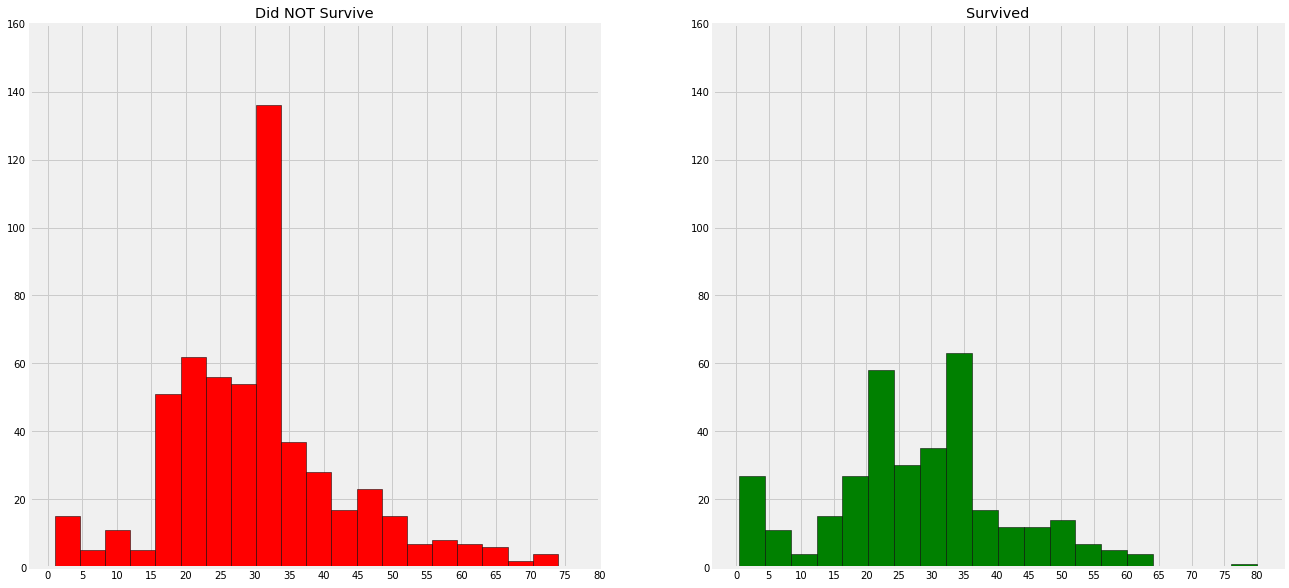

In [77]:
# Set up Figure and Axes
f, ax = plt.subplots(1, 2, figsize = (20,10))

# ax[0]
data[data['Survived'] == 0]['Age'].hist(ax = ax[0], bins = 20, edgecolor = 'black', color = 'red')
ax[0].set_title('Did NOT Survive')

# Setting ranges
# If we don't do this then the plots will look similar but will have different indices values
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
ax[0].set_ylim(0,160)

# ax[1]
data[data['Survived'] == 1]['Age'].hist(ax = ax[1], bins = 20, edgecolor = 'black', color = 'green')
ax[1].set_title('Survived')

# Setting ranges
# If we don't do this then the plots will look similar but will have different indices values
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
ax[1].set_ylim(0,160)

# Show plot
plt.show()

Might look similar but axes indices are way different

## Ponder w/ Neighbor

What things do you notice? Write your observations here!

### Exercise 4: 

1. Create a Multi-Column factorplot aka pointplot, with the `sns.catplot()` function.
2. `kind`: `'point'`
3. `data`: `data`
4. `x`: `Pclass`
5. `y`: `Survived`
6. `col`: `Initial`
7. For styles, add .styles.background_gradient(cmap='') to the end of your code.
8. Notice anything interesting?

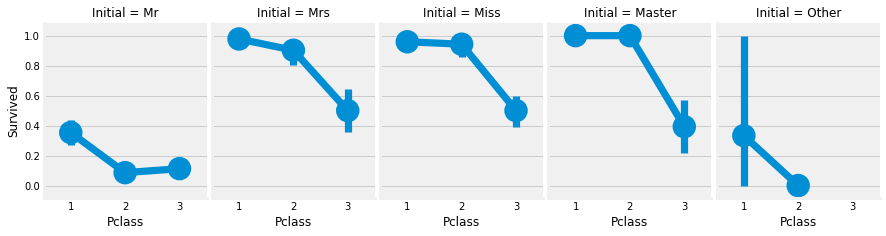

In [83]:
# catplot here!
sns.catplot(x="Pclass", y="Survived", data=data, col="Initial", kind="point")
fig = plt.gcf()
fig.set_size_inches(12,3)
plt.show()

<br>
<hr>
<br>

## ```data['Embarked]``` --> Categorical Value

In [84]:
pd.crosstab([data['Embarked'], data['Pclass']], [data['Gender'], data['Survived']], margins = True).style.background_gradient(cmap='summer_r')

### Chances for Survival by Port Of Embarkation

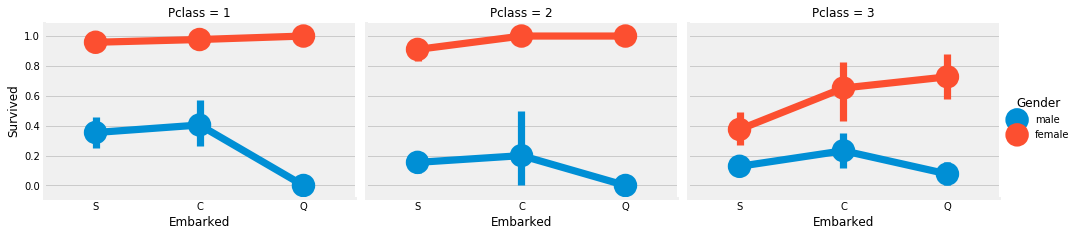

In [111]:
sns.catplot('Embarked', 'Survived', col="Pclass", data = data, kind='point', hue="Gender")
fig = plt.gcf()
fig.set_size_inches(15, 3)
plt.show()

The chances for survival for Port C is highest around 0.55 while it is lowest for S.

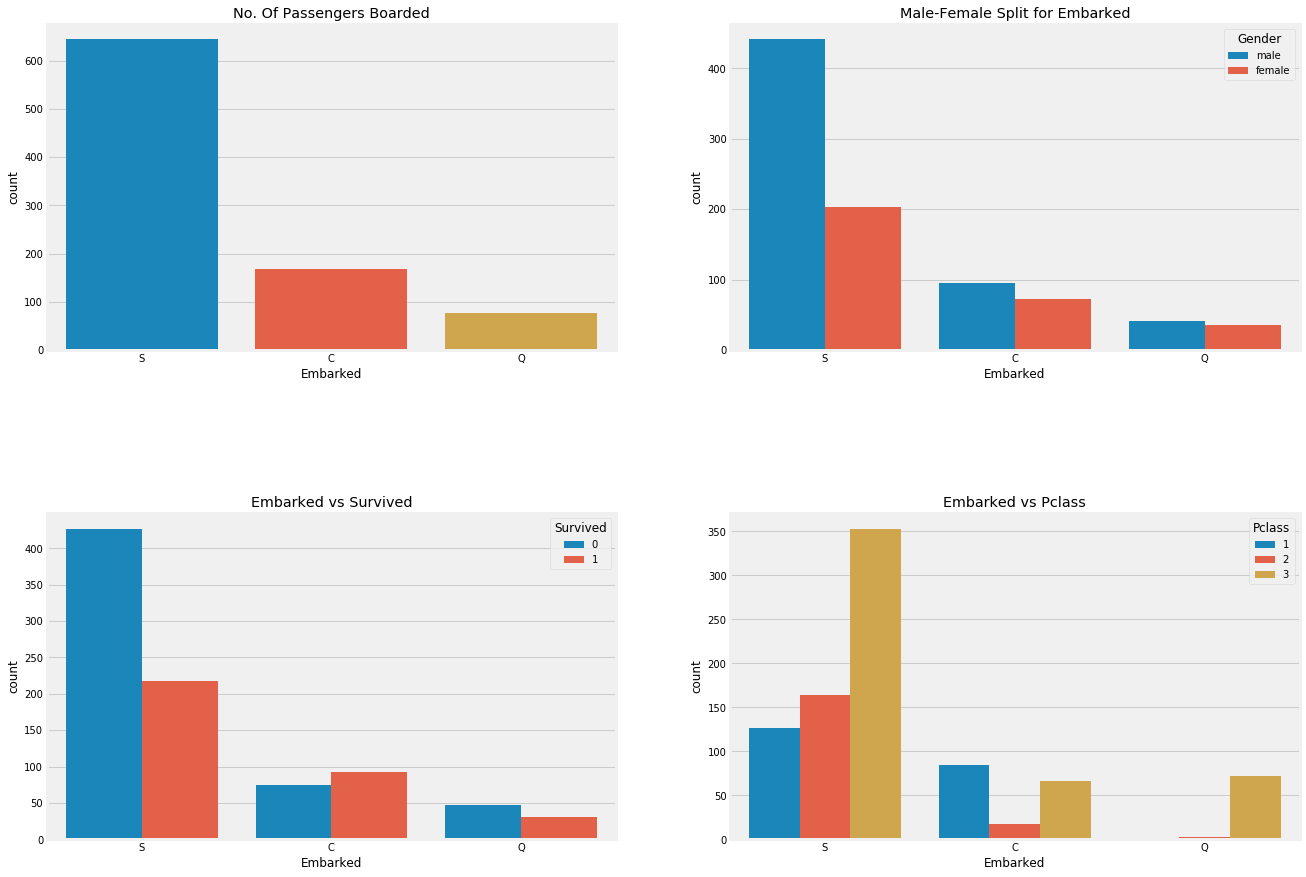

In [100]:
# set up four axes
f,ax = plt.subplots(2, 2, figsize=(20,15))

# ax[0,0]
sns.countplot('Embarked',data=data,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')

# ax[0,1]
sns.countplot('Embarked',hue='Gender',data=data,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')

# ax[1,0]
sns.countplot('Embarked',hue='Survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')

# ax[1,1]
sns.countplot('Embarked',hue='Pclass',data=data,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')


plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

## Ponder w/ Neighbor

What things do you notice? Write your observations here!

Thoughts?

<br>

### Exercise 5: 

1. Create a multi-column pointplot with the `kind`=`'point'` parameter in `sns.catplot()`
2. Compares `Pclass` to `Survived` in the x vs y axes 
3. Define the columns aka `col` with the `Embarked` variable.
4. Lastly, Add a `hue` to differentiate by `Gender`

In [116]:
sns.catplot(kind="point", x=data['Pclass'], y=data['Survived'], col=data["Embarked"], hue=data["Gender"])
#sns.catplot(kind="point", data=data, x='Pclass', y='Survived', col="Embarked", hue="Gender")

TypeError: 'NoneType' object is not subscriptable

## Ponder w/ Neighbor

What things do you notice? Write your observations here!

<br>

### Embarked: Filling NaN values

As we saw that maximum passengers boarded from Port S, we replace NaN with S.

In [ ]:
data.isnull().sum()

In [ ]:
data['Embarked'] = data['Embarked'].fillna('S')

In [ ]:
data['Embarked'].isnull().any()# Finally No NaN values

<br>

## ```data['SibSp']``` --> Discrete Feature
**This feature represents whether a person is alone or with his family members.**

**Sibling** = brother, sister, stepbrother, stepsister

**Spouse** = husband, wife 

In [134]:
pd.crosstab(data['SibSp'], data['Survived'], margins=True, normalize=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
SibSp,,,
0,0.519878,0.16055,0.680428
1,0.158257,0.0856269,0.243884
2,0.0221713,0.00993884,0.0321101
3,0.0122324,0.0030581,0.0152905
4,0.014526,0.00229358,0.0168196
5,0.00458716,0,0.00458716
8,0.00688073,0,0.00688073
All,0.738532,0.261468,1


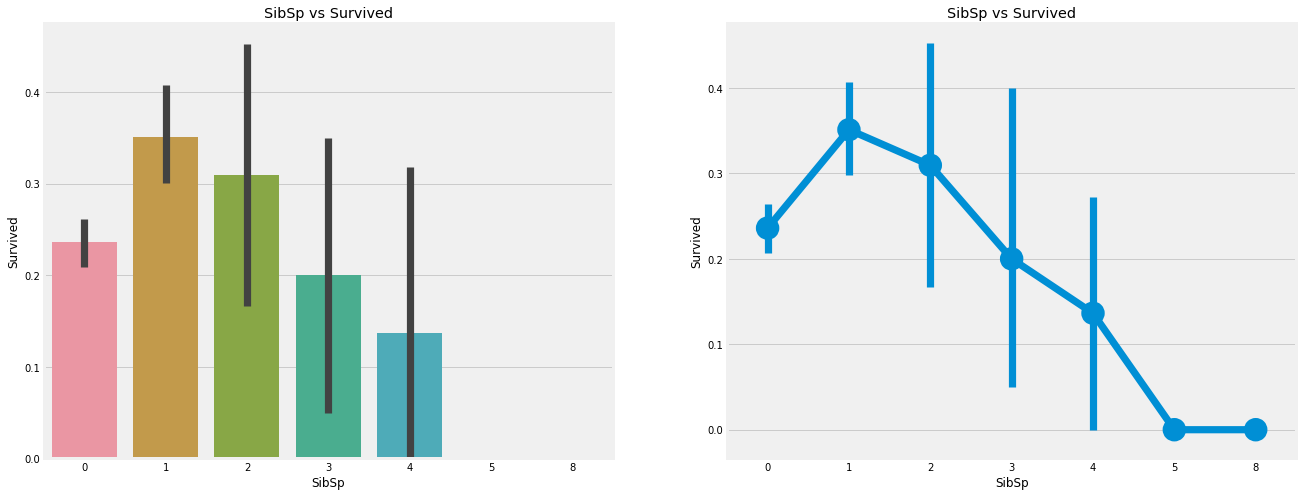

In [86]:
# set up 2 axes
f , ax = plt.subplots(1, 2 , figsize = (20,8))

# ax[0]
sns.barplot('SibSp', 'Survived', data = data, ax = ax[0])
ax[0].set_title('SibSp vs Survived')

# ax[1]
sns.catplot(x='SibSp', y='Survived', kind='point', data = data, ax = ax[1])
ax[1].set_title('SibSp vs Survived')

plt.close(2)
plt.show()

In [135]:
pd.crosstab(data['SibSp'],data['Pclass']).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,198,182,510
1,113,82,124
2,8,12,22
3,4,1,15
4,0,0,22
5,0,0,6
8,0,0,9


## Ponder w/ Neighbor

What things do you notice? Write your observations here!

<br>

## ```data['Parch']``` --> Discrete Feature

In [101]:
pd.crosstab(data['Parch'],data['Pclass']).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


The crosstab again shows that larger families were in Pclass3.

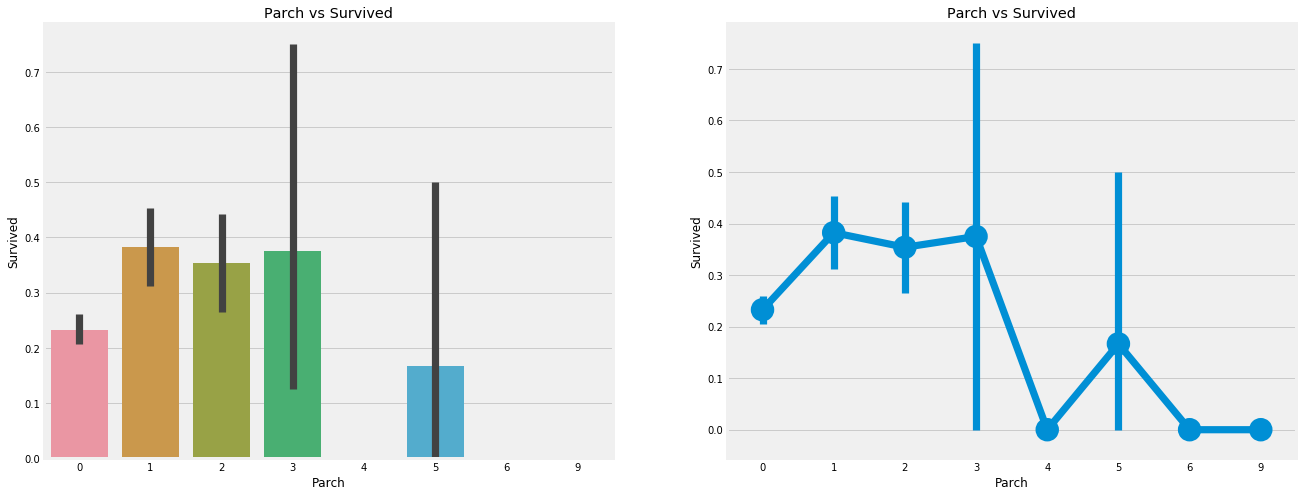

In [90]:
f,ax=plt.subplots(1,2,figsize=(20,8))

sns.barplot('Parch','Survived',data=data,ax=ax[0])
ax[0].set_title('Parch vs Survived')

sns.catplot('Parch','Survived',kind='point', data=data,ax=ax[1])
ax[1].set_title('Parch vs Survived')

plt.close(2)
plt.show()

## Ponder w/ Neighbor

What things do you notice? Write your observations here!

<br>

## ```data['Fare']``` --> Continous Feature

In [91]:
print('Highest Fare was:',data['Fare'].max())
print('Lowest Fare was:',data['Fare'].min())
print('Average Fare was:',data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 33.2954792813456


The lowest fare is **0.0**. Wow!! a free luxorious ride. 

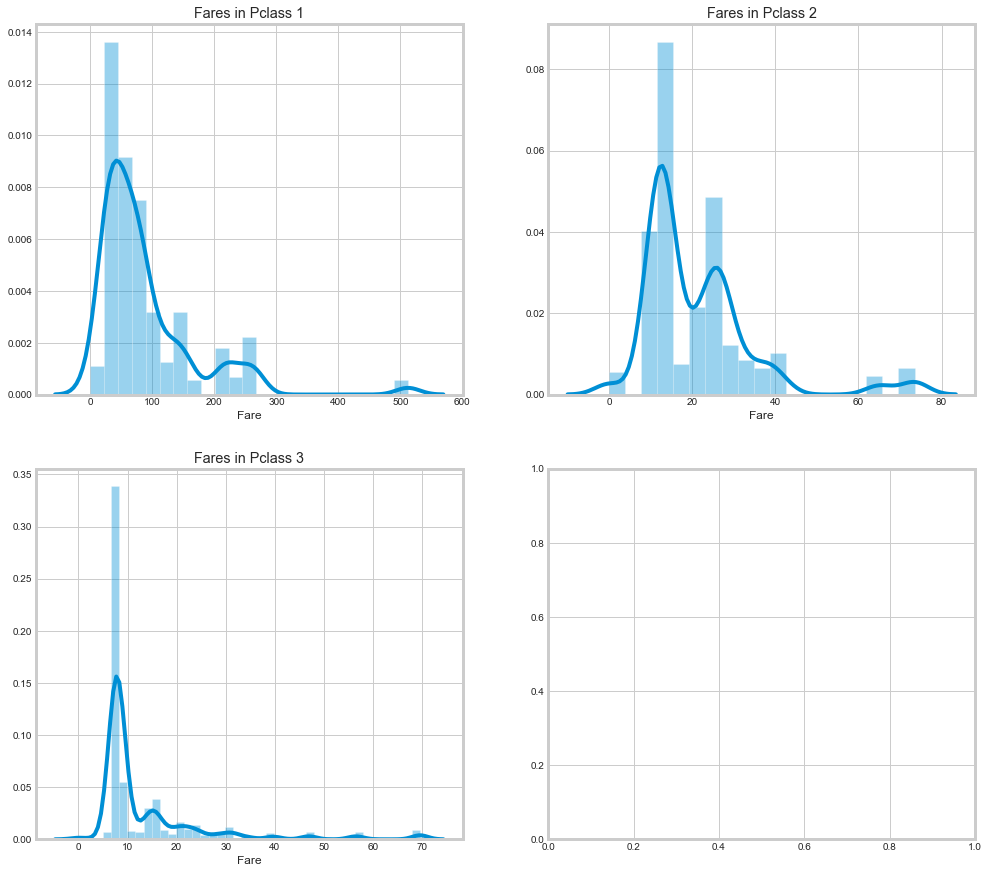

In [104]:
# Set 4 axes
f,ax=plt.subplots(2,2,figsize=(15,15))

# ax[0,0]
sns.distplot(data[data['Pclass']==1]['Fare'],ax=ax[0][0])
ax[0][0].set_title('Fares in Pclass 1')
# ax[0][0].set_xlim(-50,500)

# ax[0,1]
sns.distplot(data[data['Pclass']==2]['Fare'],ax=ax[0][1])
ax[0][1].set_title('Fares in Pclass 2')
# ax[0][1].set_xlim(-50,500)

# ax[1,0]
sns.distplot(data[data['Pclass']==3]['Fare'], ax=ax[1][0])
ax[1][0].set_title('Fares in Pclass 3')
# ax[1][0].set_xlim(-50,500)

plt.show()

<br>

## Final Observations for each Feature:
**Gender:** 
Females have higher chance of survival
Gender is a good measure, but should be in tandem with PClass

**Pclass:** 
Pclass 1 and 2 were strong indicators of survival, mostly for Female
Not quite as pronouncd for males but still a good indicator.

**Age:** 
A lot of 30-35 yr olds survived but a larger amount also persished
15-20 had a higher rate
0-10 had a good survival rate

**Embarked:** 
Lower chance of survival in port S, ecause most are from pclass 3.
Same for survival in port Q, because most are from pclass 3 .


**Parch+SibSp:** Groups of 2 had largest survival, groups smaller or larger suffered.

<br>

## Correlation Between The Features

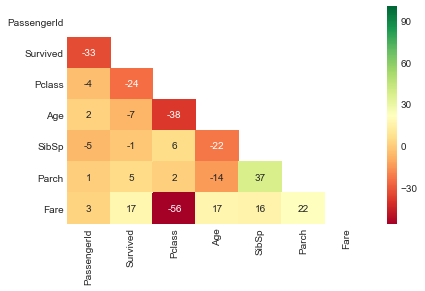

In [102]:
sns.set_style("whitegrid")

correlations = data.corr()
correlations = correlations * 100

bool_mask = np.zeros_like(correlations, dtype=np.bool)
bool_mask[np.triu_indices_from(bool_mask)] = True

sns.heatmap(correlations, annot=True, fmt='.0f', cmap = 'RdYlGn', mask=bool_mask)
plt.show()

## Ponder w/ Neighbor

What things do you notice? Write your observations here!

<br>

## Save your cleaned dataset!

In [103]:
data.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Gender            0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1013
Embarked          2
Initial           0
dtype: int64

In [ ]:
data.to_csv("../data/clean/titanic_cleaned.csv", index=None)